Welcome to day one of the 5-Day Regression Challenge! To get started, click the blue "fork notebook" button in the upper right hand corner. This will make a copy of this notebook that you can edit. To run cells once you've forked the notebook, click inside a code cell and then hit CTRL + ENTER (CMD + ENTER on a Mac).

![The button to fork this notebook](https://image.ibb.co/kNKUZ5/Screenshot_from_2017_08_30_16_47_40.png)

___ 
**What is regression?**

Regression is one way of modeling the strength and direction of the relationship between a dependent or output variable (usually represented by y) and one or more independent or input variables (usually represented by x). It differs from correlation analysis because it allows you to predict the outcome for new input or inputs you haven’t seen yet.

**What types of regression are there?**

There are many different types of regression. The specific family of regressions we’ll be learning are called “generalized linear models”. The important thing for you to know is that with this family of models, you need to pick a specific type of regression you’re interested in. The type of regression will depend on what type of data you’re trying to predict.

* **Linear**: When you’re predicting a continuous value. (What temperature will it be today?)
* **Logistic**: When you’re predicting which category your observation is in. (Is this is a cat or a dog?)What is regression?
* **Poisson**: When you’re predicting a count value. (How many dogs will I see in the park?)

Today, we’re going to practice picking the right model for our dataset and plotting it. I will demonstrate first on one dataset, then you'll try your hand at another.

___

<center>
[**You can check out a video that goes with this notebook by clicking here.**](https://www.youtube.com/embed/UOj-GJAuvPM)

## Example: Recipes
____

For our example, I'm going be working with a dataset of information on various recipes. I want to predict whether or not a recipe is a dessert based on how many calories it has. 

First, let's read in the library & datasets we'll need.

With **R**:
```
# library we'll need
library(tidyverse)

# read in all three datasets (you'll pick one to use later)
recpies <- read_csv("../input/epirecipes/epi_r.csv")
bikes <- read_csv("../input/nyc-east-river-bicycle-crossings/nyc-east-river-bicycle-counts.csv")
weather <- read_csv("../input/szeged-weather")
````

In [1]:
# library we'll need
library(tidyverse)

# read in all three datasets (you'll pick one to use later)
recpies <- read_csv("../input/epirecipes/epi_r.csv")
bikes <- read_csv("../input/nyc-east-river-bicycle-crossings/nyc-east-river-bicycle-counts.csv")
weather <- read_csv("../input/szeged-weather")

NameError: name 'library' is not defined

In **Python**:

In [2]:
# We'll need these libraries
import numpy as np
import pandas as pd 
from pandas import read_csv

# Plotting libraries
import seaborn as sns
from ggplot import *

recipes = read_csv("../input/epirecipes/epi_r.csv")
bikes = read_csv("../input/nyc-east-river-bicycle-crossings/nyc-east-river-bicycle-counts.csv")
weather = read_csv("../input/szeged-weather/weatherHistory.csv")

/opt/conda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/opt/conda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


I'm going to do a little bit of data cleaning. I know that this has some really outrageous outliers, so I want to ignore any recipe with more than ten thousand calories. I also know that there are a lot of missing values, so I'm going to remove them. (You shouldn't) need to do this with the other datasets. 

In **R**:

```
# quickly clean our dataset
recpies <- recpies %>%
    filter(calories < 10000) %>% # remove outliers
    na.omit() # remove rows with NA values
```

In [3]:
# quickly clean our dataset
recpies <- recpies %>%
    filter(calories < 10000) %>% # remove outliers
    na.omit() # remove rows with NA values

SyntaxError: invalid syntax (<ipython-input-3-de25eafa49fa>, line 2)

In **Python**:

In [4]:
recipes = recipes[recipes['calories'] < 10000].dropna()

So I already have my question, "Can I predict whether or not a recipe is a dessert based on how many calories it has?". (With your dataset you'll need to come up with your question by picking one variable to predict and one to use to predict it).

In order to build a model, I need to know what type of variable whether or not a recipe is a dessert is. There are three choices:

* **Continuous**. These are numeric variables that can take any value, including decimals. Examples include temperatures or prices.
* **Count**. These are numeric variables that can only take positive integer values. Examples include the number of people at a party or the number of cars in a parking lot.
* **Categorical**. These are not numbers. Categorical variables tell you whether or not an observation is part of a specific group. Good examples include gender or whether someone owns more than ten hats.

The best way to figure out which one is a variable is is to use your knowledge of a dataset and the world in general. For example, I know that whether or not a recipie is a dessert is a *categorical* variable, while the number of calories in a dessert is probably a *count* variable (unless you have a very, very accurate measure of calories, in which case it might be continuous).

There are some quick tests you can do to double-check, though. For example, I might want to know if the ratings for a recipie are categorical, count, or continuous. First, I can check if they're numeric:

In [5]:
# are the ratings all numeric?
print("Is this variable numeric?")
is.numeric(recpies$rating)

SyntaxError: invalid syntax (<ipython-input-5-f5322ad8847c>, line 3)

In **Python**:

In [6]:
# We'll use the numpy isreal() function
# See https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.isreal.html
print("Is this variable numeric?")
all(recipes['rating'].apply(np.isreal)) # Check that every row is True.

Is this variable numeric?


True

So I know it's represented by a numeric variable in this dataframe. This means that ratings are probably not things like "very good" or "very bad".

Next, I can check if all the values are integers (whole numbers). If so, it's probably a count variable. If not, it's probably continuous.

In **R**:
```
# are the ratings all integers?
print("Is this variable only integers?")
all.equal(recpies$rating, as.integer(recpies$rating)) == T
```

In **Python**:

In [7]:
print("Is this variable only integers?")

all(recipes['rating'] == recipes['rating'].astype(int))

Is this variable only integers?


False

So, in this dataset, ratings are a continuous variable. It's a number that can have decimal values. 

However, I'm not interested in predicting ratings. I'm interested in predicting if something is a dessert or not based on how many calories it has. To do this, I can plot the number of calories by whether or not the recipe is for a dessert. 

In [8]:
# plot calories by whether or not it's a dessert
ggplot(recpies, aes(x = calories, y = dessert)) + # draw a 
    geom_point()  # add points

SyntaxError: invalid syntax (<ipython-input-8-30c4057ab98c>, line 2)

In **Python**:

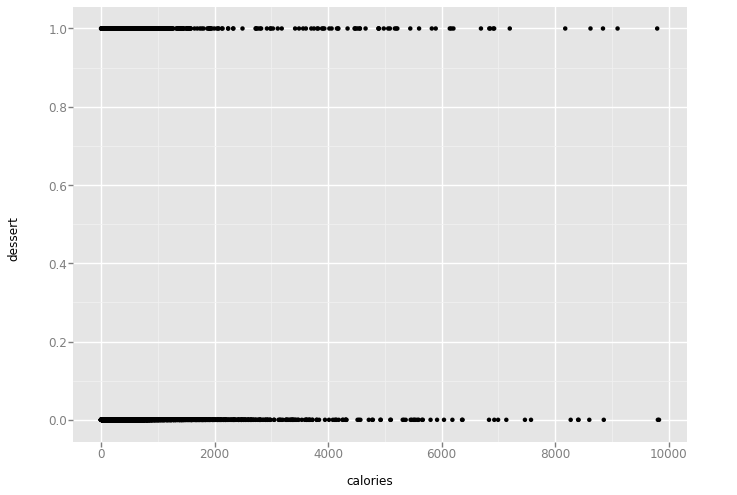

<ggplot: (8758010312126)>

In [9]:
# plot calories by whether or not it's a dessert
ggplot(recipes, aes(x='calories', y='dessert')) + geom_point()

In **Python**:

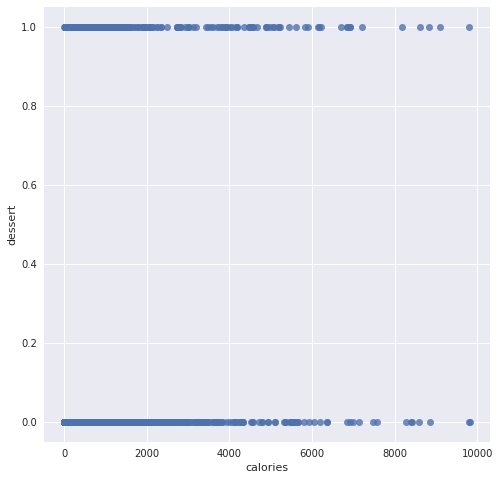

In [10]:
sns.set(style="darkgrid")
g = sns.regplot(x="calories", y="dessert", data=recipes, fit_reg=False)
g.figure.set_size_inches(8, 8)

Since whether or not something is a dessert is a categorical variable, we want to use logistic regression to answer this question. As you can see in the chart below, the link function for logistic regression is "binomial".
___
![Regression guide](https://image.ibb.co/ducqSw/regression_guide.png)
___

We can fit and plot a regression line to our data using the geom_smooth() layer. To make sure we do logistic regression, we need to make sure that we tell geom_smooth to fit a regression model from the binomial family, like so:
    
    geom_smooth(method = "glm", method.args = list(family = "binomial"))
 
 If we were fitting a linear regression model instead, for example, we'd ask geom_smooth() to fit a model from the gaussian family, like so:
    
    geom_smooth(method = "glm", method.args = list(family = "gaussian"))
    
geom_smooth() relies on the x and y arguments that you pass to ggplot (in the aes() argument), so you want to make sure you put the value you're interested in predicting in the y argument slot. (Here, that's "dessert".)

In [11]:
# plot & add a regression line
ggplot(recpies, aes(x = calories, y = dessert)) + # draw a 
    geom_point() + # add points
    geom_smooth(method = "glm", # plot a regression...
    method.args = list(family = "binomial")) # ...from the binomial family

SyntaxError: invalid syntax (<ipython-input-11-8bac5847512a>, line 2)

In **Python**:

In [12]:
import pandas as pd
import numpy as np

from ggplot.geoms.geom import geom
from ggplot.stats import smoothers
from ggplot.utils import is_date

class stat_smooth(geom):
    """
    Smoothed line charts for inspecting trends in your data. There are 3 types of
    smoothing algorithms you can use:
        LOESS ('loess', 'lowess'): Non-parmetric, local regression technique for
            calculating a smoothed curve.
        linear model ('lm'): Fits a linear model to your (x, y) coordinates
        moving average ('ma'): Calculates average of last N points in (x, y) coordinates
    In addition to plotting the smoothed line, stat_smooth will also display the
    standard error bands of the smoothed data (controlled by se=True/False).
    Parameters
    ----------
    x:
        x values for (x, y) coordinates
    y:
        y values for (x, y) coordinates. these will ultimately be smoothed
    color:
        color of the outer line
    alpha:
        transparency of color
    size:
        thickness of line
    linetype:
        type of the line ('solid', 'dashed', 'dashdot', 'dotted')
    se:
        boolean value for whether or not to display standard error bands; defaults to True
    method:
        type of smoothing to ues ('loess', 'ma', 'lm')
    window:
        number of periods to include in moving average calculation
    Examples
    --------
    """

    DEFAULT_AES = {'color': 'black'}
    DEFAULT_PARAMS = {'geom': 'smooth', 'position': 'identity', 'method': 'auto',
            'se': True, 'n': 80, 'fullrange': False, 'level': 0.95,
            'span': 2/3., 'window': None}
    REQUIRED_AES = {'x', 'y'}
    _aes_renames = {'size': 'linewidth', 'linetype': 'linestyle'}

    def plot(self, ax, data, _aes):
        (data, _aes) = self._update_data(data, _aes)
        variables = _aes.data
        data = data[list(variables.values())]
        data = data.dropna()
        x = data[variables['x']]
        y = data[variables['y']]

        params = {'alpha': 0.2}

        se = self.params.get('se', True)
        method = self.params.get('method', 'lm')
        level = self.params.get('level', 0.95)
        window = self.params.get('window', None)
        span = self.params.get('span', 2/3.)

        if method == "lm":
            x, y, y1, y2 = smoothers.lm(x, y, 1-level)
        elif method == "ma":
            x, y, y1, y2 = smoothers.mavg(x, y, window=window)
        else:
            x, y, y1, y2 = smoothers.lowess(x, y, span=span)

        smoothed_data = pd.DataFrame(dict(x=x, y=y, y1=y1, y2=y2))
        try:  # change in Pandas-0.19
            smoothed_data = smoothed_data.sort_values(by='x')
        except:  # before Pandas-0.19
            smoothed_data = smoothed_data.sort('x')

        params = self._get_plot_args(data, _aes)
        if 'alpha' not in params:
            params['alpha'] = 0.2

        order = np.argsort(x)
        if self.params.get('se', True)==True:
            if is_date(smoothed_data.x.iloc[0]):
                dtype = smoothed_data.x.iloc[0].__class__
                x = np.array([i.toordinal() for i in smoothed_data.x])
                ax.fill_between(x, smoothed_data.y1, smoothed_data.y2, **params)
                new_ticks = [dtype(i) for i in ax.get_xticks()]
                ax.set_xticklabels(new_ticks)
            else:
                ax.fill_between(smoothed_data.x, smoothed_data.y1, smoothed_data.y2, **params)
        if self.params.get('fit', True)==True:
            del params['alpha']
            ax.plot(smoothed_data.x, smoothed_data.y, **params)

Note: We've to manually hack the stat_smooth because of the difference in post Pandas version 0.19

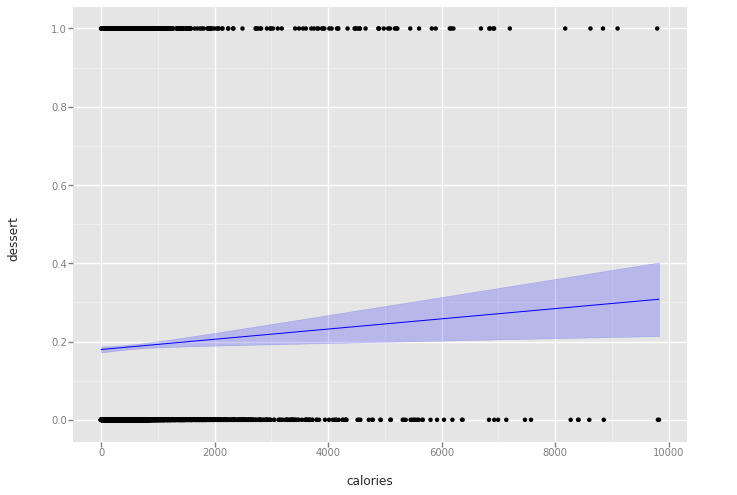

<ggplot: (8758009794168)>

In [13]:
ggplot(recipes, aes(x='calories', y='dessert')) + geom_point() + \
stat_smooth(method="lm", color='blue')

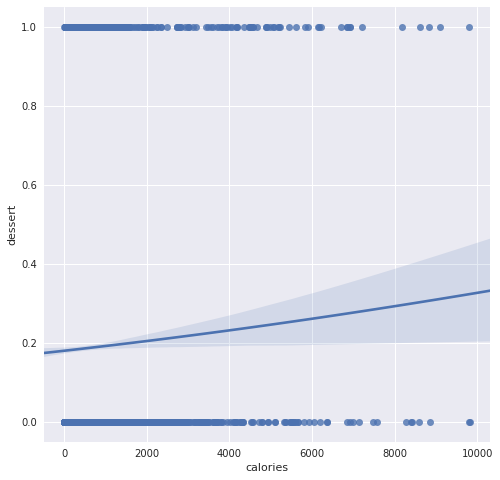

In [14]:
sns.set(style="darkgrid")
g = sns.regplot(x="calories", y="dessert", data=recipes, logistic=True)
g.figure.set_size_inches(8, 8)

That blue line we've plotted is actually a regression model! Looking at the regression line, we can tell that as the number of calories in a recipe increases, it's more likely that that recipe is a dessert. (We can tell this because the line moves towards 1, which means "is a dessert" and away from 0, which means "isn't a dessert"). 

The grey shape behind it is the standard error. Looking at the error, we can tell that we're pretty sure about our prediction when there's fewer calories (towards the left side of the graph), but as we move to the right we get less certain and our error increases.

We'll learn more about fitting and interpreting models tomorrow, but for now it's time for you to try your own hand at picking the right type of model and fitting it.

## Your turn!
___
![Regression guide](https://image.ibb.co/ducqSw/regression_guide.png)

A quick guide to the three types of regression we've talked about.
___

Now it's your turn to come up with a question, pick the right model for your data and plot it.

1. Pick one of the two datasets ("weather" or "bikes", your choice! You can find out more about these datasets by expanding the "Input" section at the very top of this notebook.)
2. Identify which variables are continuous, categorical and count using the dataset documentation. (You can also check out a summary of the dataset using summary() or str())
3. Pick a variable to predict and one varaible to use to predict it
    * For this challange, if you're picking a categorical value, I'd recommend choosing one with only two possible categories (like dessert or not dessert)
4. Plot your two variables
5. Use "geom_smooth" and the appropriate family to fit and plot a model
6. Optional: If you want to share your analysis with friends or to ask for help, you’ll need to make it public so that other people can see it.
  * Publish your kernel by hitting the big blue “publish” button. (This may take a second.)
  * Change the visibility to “public” by clicking on the blue “Make Public” text (right above the “Fork Notebook” button).
  * Tag your notebook with 5daychallenge

**The above code is referenced from Liling Tan**

In [15]:
# your work goes here! :)
import re 

def strtonum( s , defaultValue=0):
    if not np.isreal(s):
        try:
            f = float(splitnum( s ))
        except:
            f = defaultValue
    else:
        f = s
    return f

def splitnum(s):
    return re.match('[0-9.]+', s).group()

# Extraction of digital
print('Precipitation: ' + bikes['Precipitation'][3])
print(strtonum(bikes['Precipitation'][3]))

Precipitation: 0.47 (S)
0.47


In [16]:
# Extraction of digital
bikes['Precipitation'] = bikes['Precipitation'].map(strtonum)
# print(bikes['Precipitation'])
print(bikes.columns)



Index(['Unnamed: 0', 'Date', 'Day', 'High Temp (°F)', 'Low Temp (°F)',
       'Precipitation', 'Brooklyn Bridge', 'Manhattan Bridge',
       'Williamsburg Bridge', 'Queensboro Bridge', 'Total'],
      dtype='object')


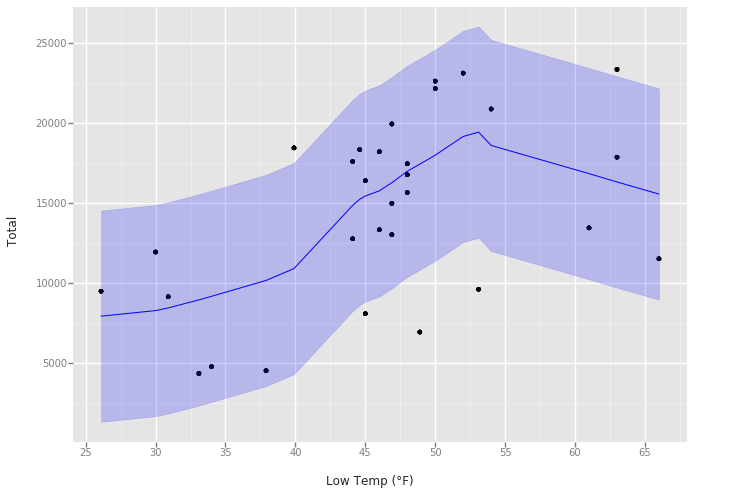

<ggplot: (8757883707084)>

In [17]:
ggplot(bikes,aes(x='Low Temp (°F)', y='Total')) + geom_point() + \
stat_smooth(method="loess", color='blue')

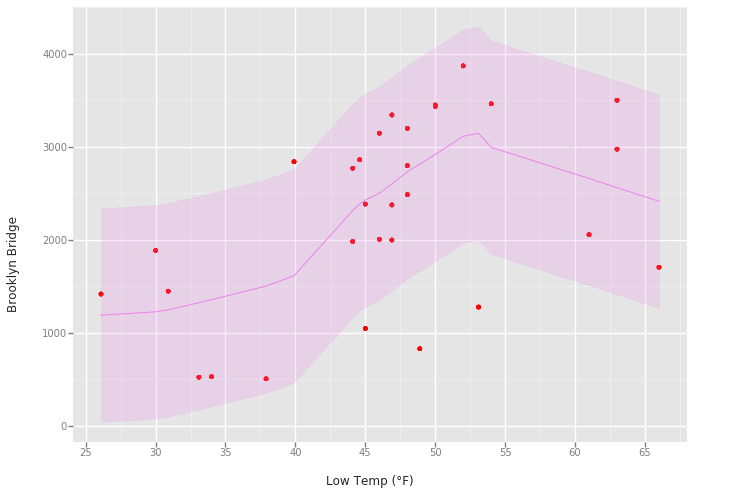

<ggplot: (-9223363278971102229)>

In [18]:
ggplot(bikes,aes(x='Low Temp (°F)', y='Brooklyn Bridge')) + geom_point(color='red') + \
stat_smooth(method="loess", color='violet', se=True)

In [19]:
# Compute sigmoid function
def sigmoid(X):
    den =1.0+e**(-1.0* X)
    gz =1.0/den
    return gz

# computes cost given predicted and actual values  
def compute_cost(theta,X,y):
    m = X.shape[0]#number of training examples
    theta = reshape(theta,(len(theta),1))
    
    J =(1./m)*(-transpose(y)
               .dot(log(sigmoid(X.dot(theta))))- transpose(1-y)
               .dot(log(1-sigmoid(X.dot(theta)))))
    grad = transpose((1./m)*transpose(sigmoid(X.dot(theta))- y).dot(X))
    #optimize.fmin expects a single value, so cannot return grad
    return J[0][0]#,grad

# compute gradient
def compute_grad(theta, X, y):
    theta.shape =(1,3)
    grad = zeros(3)
    h = sigmoid(X.dot(theta.T))
    delta = h - y
    l = grad.size
    for i in range(l):
        sumdelta = delta.T.dot(X[:, i])
        grad[i]=(1.0/ m)* sumdelta *-1
    theta.shape =(3,)
    return  grad  

Want more? Ready for a different dataset? [This notebook](https://www.kaggle.com/rtatman/datasets-for-regression-analysis/) has additional dataset suggestions for you to practice regression with. 